# Deep RNN/ Stack RNN:
Why Use RNN ?
1. Hierarchical Representation
2. Customization for Advanced Taks

When to use deep RNN ?
1. complex task like speech recognition, machine translational
2. large datasets(overfitting)
3. computational power
4. in simpler model use deep RNN for improve performance


Deep RNN capture Hierarichal representation.


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [10]:
# Load the IMDB dataset
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

# Pad Sequences to have the same length
x_train = pad_sequences(x_train,maxlen=100)
x_test = pad_sequences(x_test,maxlen=100)


In [11]:
# Define Deep RNN Model:
model1 = Sequential(
    [
        Embedding(10000,32,input_length=100),
        SimpleRNN(5,return_sequences=True),
        SimpleRNN(5),
        Dense(1,activation='sigmoid')
    ]
)

In [18]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.build(input_shape=(None,32))

In [19]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 32, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 32, 5)               │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,251 (1.22 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

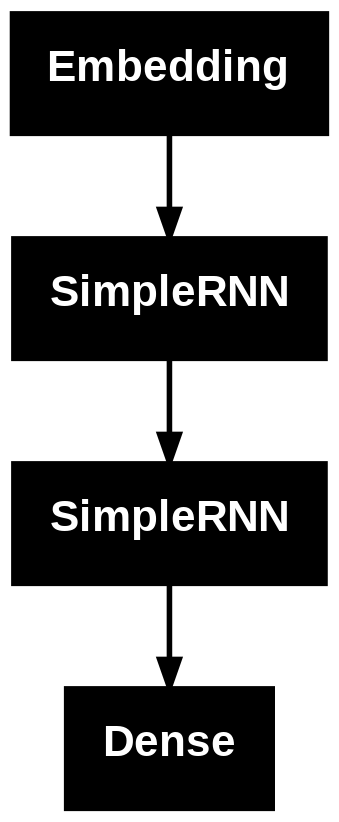

In [27]:
plot_model(model1)

In [20]:
history1 = model1.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.5244 - loss: 0.6937 - val_accuracy: 0.5782 - val_loss: 0.6661
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.7270 - loss: 0.5647 - val_accuracy: 0.7434 - val_loss: 0.5417
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8748 - loss: 0.3191 - val_accuracy: 0.7522 - val_loss: 0.5777
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9330 - loss: 0.1914 - val_accuracy: 0.7554 - val_loss: 0.6247
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9656 - loss: 0.1125 - val_accuracy: 0.7436 - val_loss: 0.7429


# Deep LSTM Model

In [21]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [22]:
model2 = Sequential(
    [
      Embedding(10000,32,input_length=100),
      LSTM(5,return_sequences=True),
      LSTM(5),
      Dense(1,activation='sigmoid')
    ]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 32, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32, 5)               │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5)                   │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,986 (1.22 MB)

 Trainable params: 320,986 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

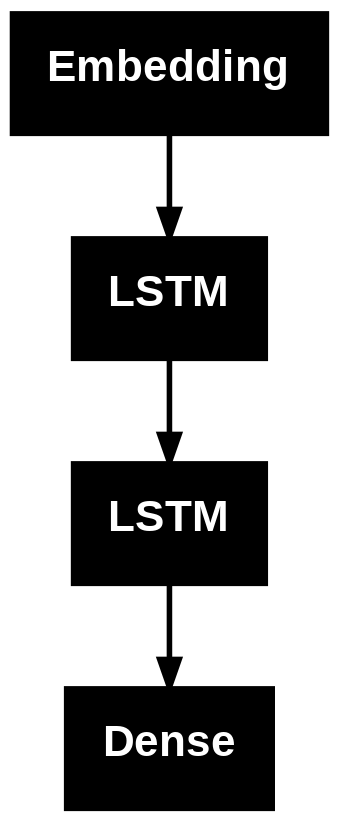

In [26]:
plot_model(model2)

In [23]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.build(input_shape=(None,32))

In [25]:
history2= model2.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 71ms/step - accuracy: 0.6826 - loss: 0.5871 - val_accuracy: 0.8118 - val_loss: 0.4345
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.8659 - loss: 0.3458 - val_accuracy: 0.8376 - val_loss: 0.3836
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9065 - loss: 0.2529 - val_accuracy: 0.8352 - val_loss: 0.4056
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9344 - loss: 0.1935 - val_accuracy: 0.8360 - val_loss: 0.3991
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9543 - loss: 0.1468 - val_accuracy: 0.8284 - val_loss: 0.4610


# Build Deep GRU Neural Network

In [28]:
from tensorflow.keras.layers import Embedding, GRU, Dense

In [29]:

model3 = Sequential(
    [
      Embedding(10000,32,input_length=100),
      GRU(5,return_sequences=True),
      GRU(5),
      Dense(1,activation='sigmoid')
    ]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model3.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model3.build(input_shape=(None,32))

In [32]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 32, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 32, 5)               │             585 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 5)                   │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,771 (1.22 MB)

 Trainable params: 320,771 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

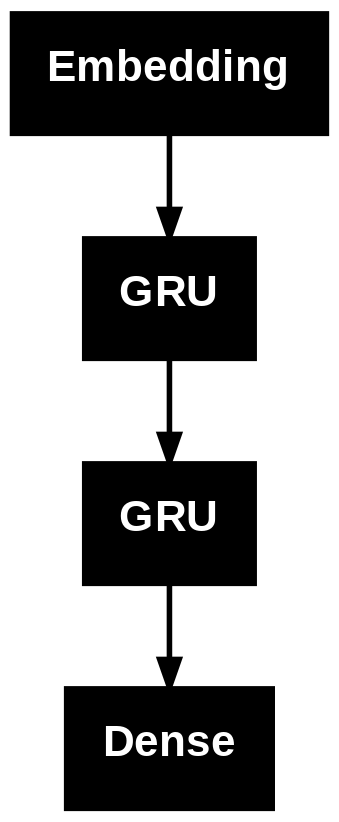

In [33]:
plot_model(model3)

In [34]:
history3= model3.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.6500 - loss: 0.6051 - val_accuracy: 0.8166 - val_loss: 0.4143
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8655 - loss: 0.3341 - val_accuracy: 0.8338 - val_loss: 0.3807
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9096 - loss: 0.2378 - val_accuracy: 0.8416 - val_loss: 0.3718
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9369 - loss: 0.1779 - val_accuracy: 0.8330 - val_loss: 0.4231
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9567 - loss: 0.1307 - val_accuracy: 0.8318 - val_loss: 0.4497


# Deep Bidirectional Model:

In [35]:
from tensorflow.keras.layers import Embedding, SimpleRNN,Bidirectional, Dense

In [36]:
model4 = Sequential(
    [
      Embedding(10000,32,input_length=100),
      Bidirectional(SimpleRNN(5,return_sequences=True)),
      Bidirectional(SimpleRNN(5)),
      Dense(1,activation='sigmoid')
    ]

)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model4.build(input_shape=(None,5))

In [38]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 5, 32)               │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 5, 10)               │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,551 (1.22 MB)

 Trainable params: 320,551 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

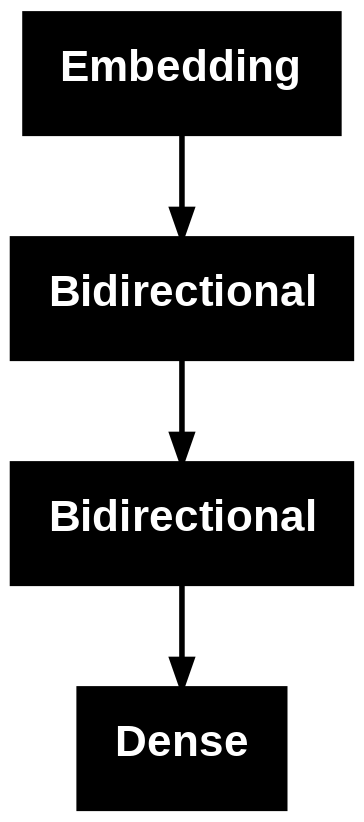

In [39]:
plot_model(model4)

In [40]:
history4= model4.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.6543 - loss: 0.6115 - val_accuracy: 0.7724 - val_loss: 0.4973
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7986 - loss: 0.4456 - val_accuracy: 0.7802 - val_loss: 0.4719
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8701 - loss: 0.3141 - val_accuracy: 0.7800 - val_loss: 0.5002
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9091 - loss: 0.2455 - val_accuracy: 0.7776 - val_loss: 0.5157
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9573 - loss: 0.1374 - val_accuracy: 0.7818 - val_loss: 0.5593


In [41]:
import matplotlib.pyplot as plt

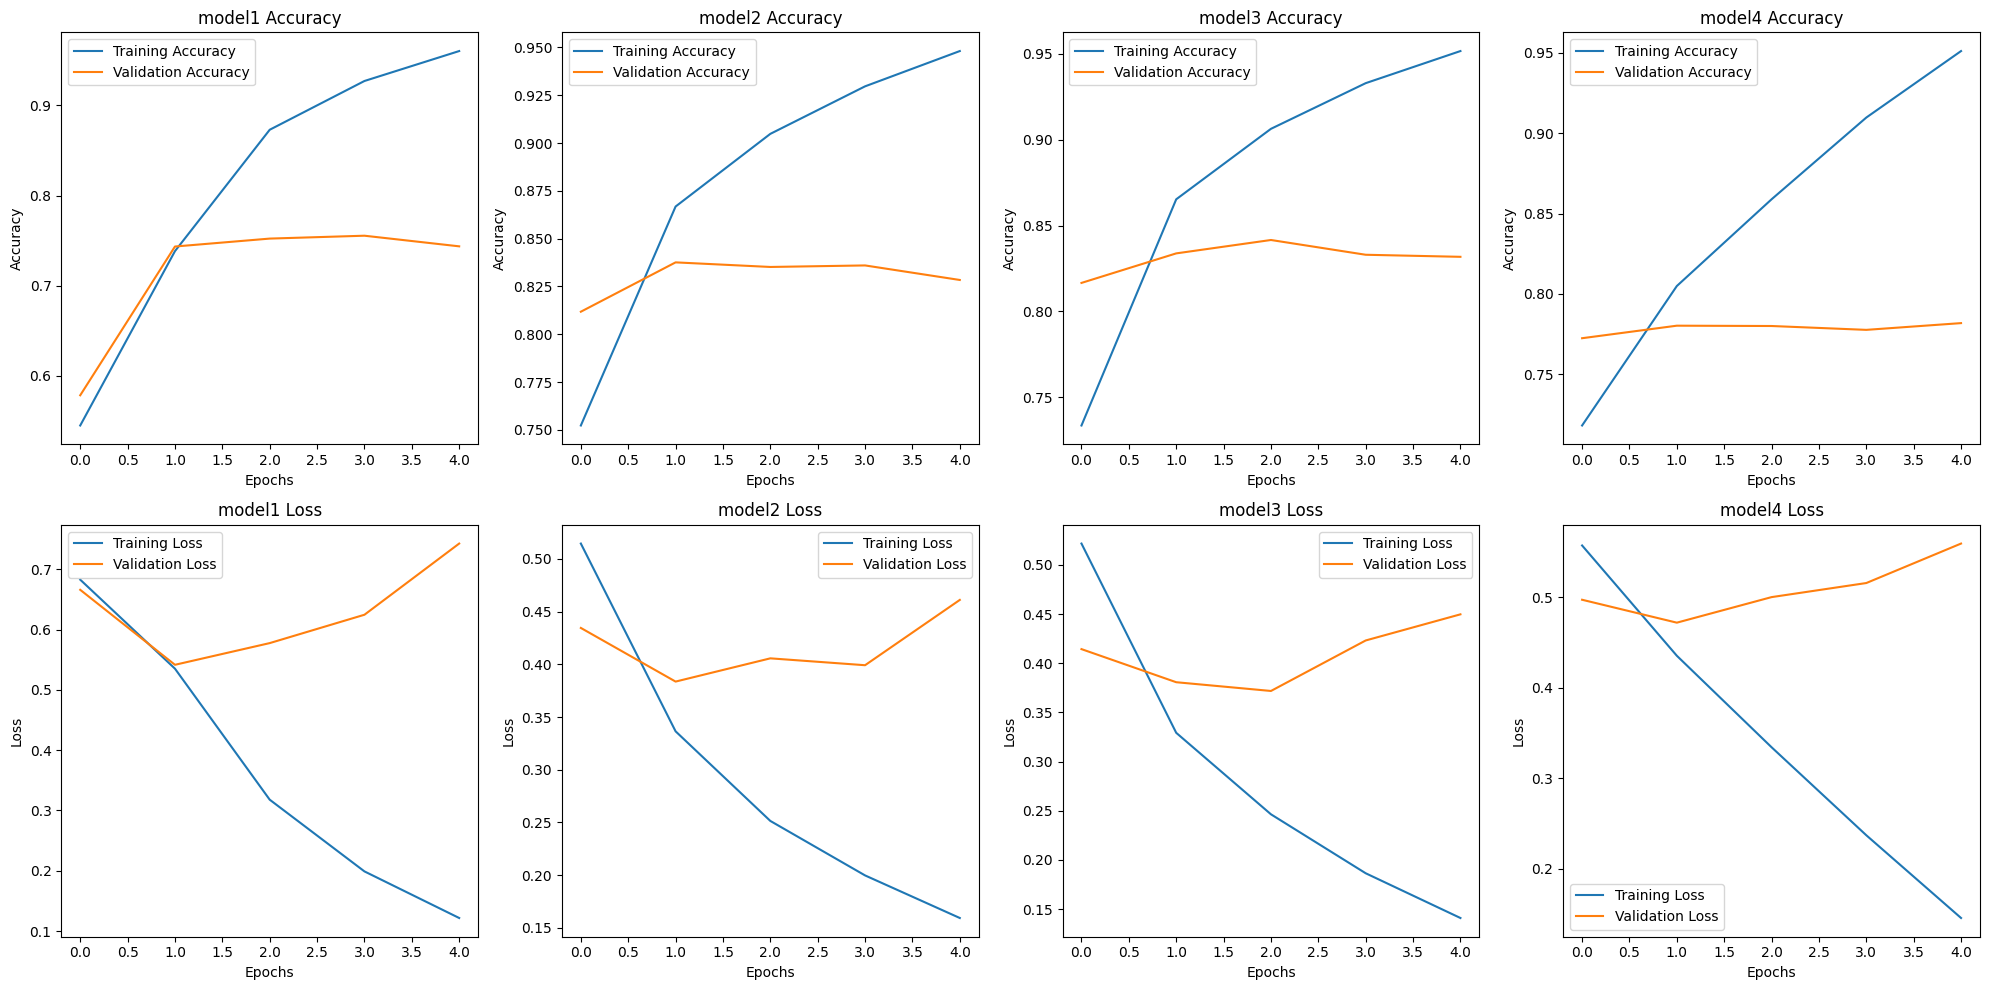

In [54]:
# Assuming you have 4 models and their respective histories
models = ['model1', 'model2', 'model3', 'model4']
histories = [history1, history2, history3, history4]  # Replace with actual histories

# Create a figure for the subplots
plt.figure(figsize=(20, 10))  # Adjust figure size for better visualization

for i, (model_name, history) in enumerate(zip(models, histories)):
    # Accuracy plot for the current model
    plt.subplot(2, 4, i + 1)  # First row for accuracy (2 rows, 4 columns, position i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss plot for the current model
    plt.subplot(2, 4, i + 5)  # Second row for loss (2 rows, 4 columns, position i+5)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()